In [49]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

#import warnings
#warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'


from IPython.display import Image



from pylab import rcParams
from sklearn.preprocessing import scale
from collections import Counter

In [3]:
VES_FAM = pd.read_csv('VES.csv', delimiter=';')

In [4]:
VES_FAM.head()

,NUMBER,NAME,DESIG,FAM,S,CLASS,S.1,F,DIA.,S.2,...,F.3,AMIN,AMAX,U,NOTES,BIN,PRI,SAM,SD,WF
0,4.0,Vesta,NaN,V,S,V,S,NaN,468.30,M,...,NaN,0.12,0.19,3.0,NaN,NaN,NaN,Y,NaN,NaN
1,9.0,Metis,NaN,V,T,S,L,NaN,199.96,L,...,NaN,0.05,0.32,3.0,NaN,NaN,NaN,Y,NaN,NaN
2,17.0,Thetis,NaN,V,S,S,L,NaN,93.34,L,...,NaN,0.20,0.40,3.0,NaN,NaN,NaN,Y,NaN,NaN
3,63.0,Ausonia,NaN,V,S,S,L,NaN,90.00,M,...,NaN,0.27,0.47,3.0,NaN,NaN,NaN,Y,NaN,NaN
4,113.0,Amalthea,NaN,V,S,S,S,NaN,46.14,M,...,NaN,0.19,0.22,3.0,NaN,?,NaN,Y,NaN,NaN


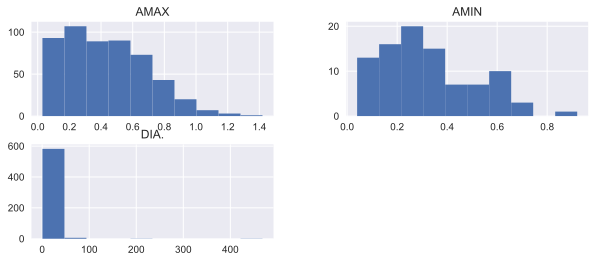

In [55]:
hist3 = ['DIA.', 'AMIN', 'AMAX']
VES_FAM[hist3].hist(figsize=(10, 4));


1

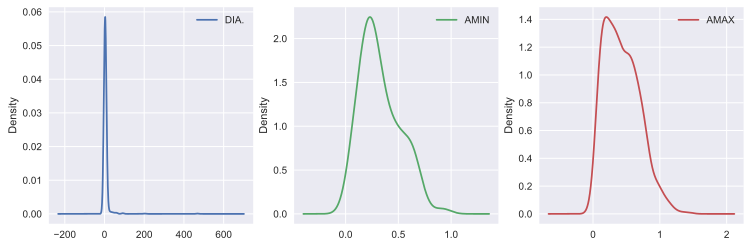

In [8]:
VES_FAM[hist3].plot(kind='density', subplots=True, layout=(1, 3), 
                  sharex=False, figsize=(12.5,4)); 1

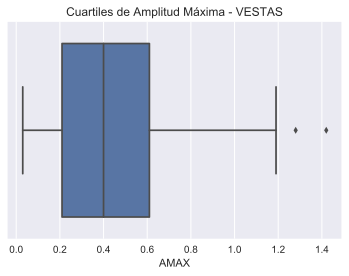

In [63]:
sns.boxplot(x='AMAX',data=CVES)
plt.title("Cuartiles de Amplitud Máxima - VESTAS")
plt.show()


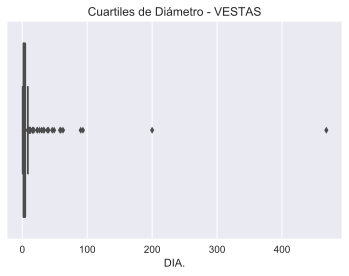

In [64]:
sns.boxplot(x='DIA.', data=CVES);
plt.title("Cuartiles de Diámetro - VESTAS")
plt.show()

## Eliminando asteroides con datos incompletos

In [17]:
VES_FAM.describe(include=['object'])

,NAME,DESIG,FAM,S,CLASS,S.1,S.2,S.3,F.2,F.3,NOTES,BIN,PRI,SAM,SD,WF
count,590,582,590,590,590,590,590,590,55,23,153,14,4,64,23,389
unique,590,582,1,3,8,5,12,4,2,1,14,2,1,1,1,1
top,2003 YP112,2003 YP112,V,A,S,C,T,A,S,>,N,?,Y,Y,Y,Y
freq,1,1,590,558,555,547,311,570,33,23,43,7,4,64,23,389


In [19]:
VES_FAM.describe()

,NUMBER,F,DIA.,H,B,F.1,ALBEDO,PERIOD,P,DESC,AMIN,AMAX,U
count,587.000000,0.0,590.000000,590.000000,0.0,0.0,590.000000,550.000000,0.0,0.0,92.000000,526.000000,534.000000
mean,76885.303237,NaN,5.681508,14.945017,NaN,NaN,0.203075,20.185603,NaN,NaN,0.327174,0.433137,2.061798
std,97121.026226,NaN,22.217395,1.736114,NaN,NaN,0.036107,78.248759,NaN,NaN,0.188081,0.260693,0.499457
min,4.000000,NaN,0.560000,3.200000,NaN,NaN,0.034100,0.570000,NaN,NaN,0.040000,0.030000,1.000000
25%,11782.000000,NaN,1.750000,14.022500,NaN,NaN,0.200000,4.359000,NaN,NaN,0.200000,0.210000,2.000000
50%,43662.000000,NaN,2.650000,15.245000,NaN,NaN,0.200000,6.302000,NaN,NaN,0.275000,0.400000,2.000000
75%,102232.000000,NaN,4.622500,16.150000,NaN,NaN,0.200000,10.801500,NaN,NaN,0.452500,0.610000,2.000000
max,513917.000000,NaN,468.300000,18.590000,NaN,NaN,0.460000,1234.171000,NaN,NaN,0.920000,1.420000,3.000000


Tenemos 590 asteroides, de los cuales tienen:

590, el valor del diámetro

92, el valor de la amplitud mínima

526, el valor de la amplitud máxima

550, el valor del periodo




In [20]:
VES_FAM.replace([np.inf, -np.inf], np.nan)
CVES=VES_FAM.dropna(subset=['DIA.', 'AMAX'])
#new_EOS_FAM = EOS_FAM.drop('DIA',axis ='columns')

In [21]:
CVES.head()

,NUMBER,NAME,DESIG,FAM,S,CLASS,S.1,F,DIA.,S.2,...,F.3,AMIN,AMAX,U,NOTES,BIN,PRI,SAM,SD,WF
0,4.0,Vesta,NaN,V,S,V,S,NaN,468.30,M,...,NaN,0.12,0.19,3.0,NaN,NaN,NaN,Y,NaN,NaN
1,9.0,Metis,NaN,V,T,S,L,NaN,199.96,L,...,NaN,0.05,0.32,3.0,NaN,NaN,NaN,Y,NaN,NaN
2,17.0,Thetis,NaN,V,S,S,L,NaN,93.34,L,...,NaN,0.20,0.40,3.0,NaN,NaN,NaN,Y,NaN,NaN
3,63.0,Ausonia,NaN,V,S,S,L,NaN,90.00,M,...,NaN,0.27,0.47,3.0,NaN,NaN,NaN,Y,NaN,NaN
4,113.0,Amalthea,NaN,V,S,S,S,NaN,46.14,M,...,NaN,0.19,0.22,3.0,NaN,?,NaN,Y,NaN,NaN


In [22]:
CVES.describe()

,NUMBER,F,DIA.,H,B,F.1,ALBEDO,PERIOD,P,DESC,AMIN,AMAX,U
count,523.000000,0.0,526.000000,526.000000,0.0,0.0,526.000000,519.000000,0.0,0.0,92.000000,526.000000,501.000000
mean,74183.839388,NaN,5.943422,14.938346,NaN,NaN,0.203449,20.630759,NaN,NaN,0.327174,0.433137,2.065868
std,91960.312841,NaN,23.509512,1.778724,NaN,NaN,0.038227,80.452959,NaN,NaN,0.188081,0.260693,0.515415
min,4.000000,NaN,0.560000,3.200000,NaN,NaN,0.034100,0.570000,NaN,NaN,0.040000,0.030000,1.000000
25%,11782.000000,NaN,1.742500,14.052500,NaN,NaN,0.200000,4.290000,NaN,NaN,0.200000,0.210000,2.000000
50%,43662.000000,NaN,2.610000,15.280000,NaN,NaN,0.200000,6.252000,NaN,NaN,0.275000,0.400000,2.000000
75%,97245.500000,NaN,4.550000,16.157500,NaN,NaN,0.200000,10.667500,NaN,NaN,0.452500,0.610000,2.000000
max,513917.000000,NaN,468.300000,18.590000,NaN,NaN,0.460000,1234.171000,NaN,NaN,0.920000,1.420000,3.000000


In [23]:
CVES.corr()

,NUMBER,F,DIA.,H,B,F.1,ALBEDO,PERIOD,P,DESC,AMIN,AMAX,U
NUMBER,1.000000,NaN,-0.143913,0.661285,NaN,NaN,-0.065892,-0.053033,NaN,NaN,0.323096,0.177979,-0.288981
F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DIA.,-0.143913,NaN,1.000000,-0.570870,NaN,NaN,0.125077,-0.005034,NaN,NaN,-0.271119,-0.069204,0.237883
H,0.661285,NaN,-0.570870,1.000000,NaN,NaN,-0.128341,-0.033416,NaN,NaN,0.493413,0.236626,-0.514457
B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALBEDO,-0.065892,NaN,0.125077,-0.128341,NaN,NaN,1.000000,-0.025237,NaN,NaN,0.086369,-0.038251,0.093760
PERIOD,-0.053033,NaN,-0.005034,-0.033416,NaN,NaN,-0.025237,1.000000,NaN,NaN,0.103958,0.155961,-0.015952
P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DESC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


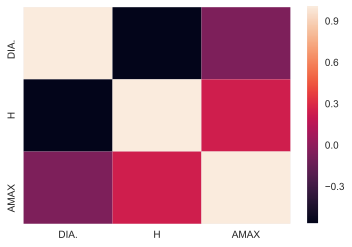

In [24]:
numerical3 = list(set(['DIA.','H', 'AMAX']))
corr_matrix3 = CVES[numerical3].corr()
sns.heatmap(corr_matrix3);

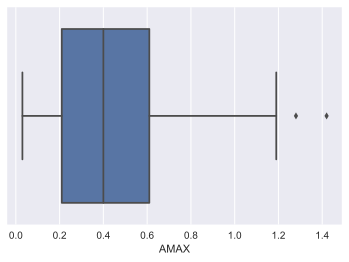

In [27]:
sns.boxplot(x='AMAX', data=CVES);

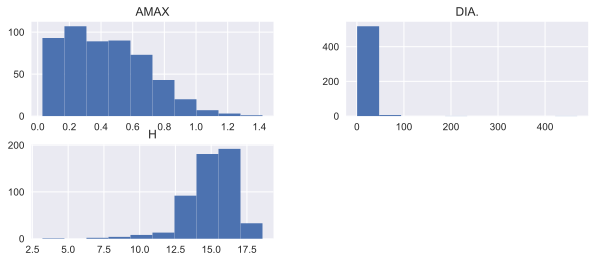

In [44]:
hist5 = ['DIA.', 'H', 'AMAX']
CVES[hist5].hist(figsize=(10, 4));

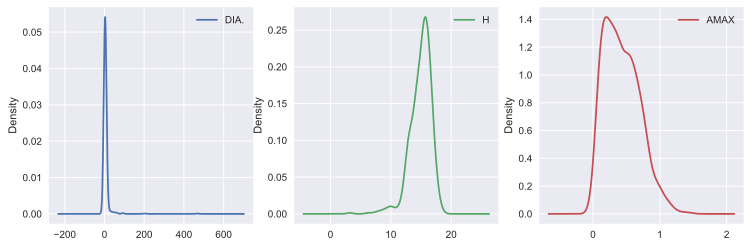

In [45]:
CVES[hist5].plot(kind='density', subplots=True, layout=(1, 3), 
                  sharex=False, figsize=(12.5,4));

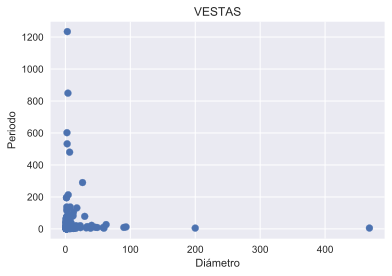

In [58]:
plt.scatter(CVES['DIA.'], CVES['PERIOD']);
plt.title("VESTAS")
plt.xlabel("Diámetro")
plt.ylabel("Periodo")
plt.show()

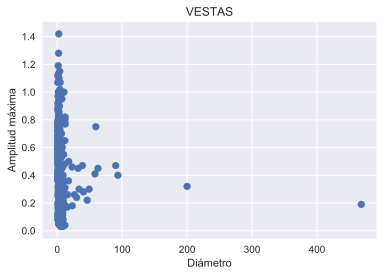

In [65]:
plt.scatter(CVES['DIA.'], CVES['AMAX']);
plt.title("VESTAS")
plt.xlabel("Diámetro")
plt.ylabel("Amplitud máxima")
plt.show()